In [2]:
import requests
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
%matplotlib inline

In [5]:
# forex = pd.read_csv('dataset/forex.csv')
AI = pd.read_csv('dataset/AI.csv')
blockchain = pd.read_csv('dataset/blockchain.csv')
Kpop = pd.read_csv('dataset/Kpop.csv')
HP = pd.read_csv('dataset/HP.csv')
CW= pd.read_csv('dataset/The Cold War.csv')
SQL = pd.read_csv('dataset/SQL.csv')
Sushi = pd.read_csv('dataset/Sushi.csv')
DW = pd.read_csv('dataset/deepweb.csv')

In [6]:
frames = [AI, blockchain, Kpop, HP, CW, SQL, Sushi, DW]

In [7]:
result = pd.concat(frames)

In [8]:
from sklearn.utils import shuffle
result = shuffle(result)

In [9]:
result

,Unnamed: 0,answer,author,question,topic
12,12,"I've read a lot of Andrew's comments, so I'll ...",Alexander Moreno,How did Andrew Ng become so good at Machine Le...,Artificial Intelligence
24,24,"After the Berlin Wall fell in late-1989, UK Pr...",Justin Mihalick,Was Margaret Thatcher right to fear and oppose...,The Cold War
14,14,Best Online Resources for Learning SQL and Dat...,Alex Maison,How do I learn more advanced SQL?,SQL
31,31,They say there is no such thing like a stupid ...,Raul Popa,"What should I learn first, machine learning, A...",Deep Web
11,11,Originally Answered: Did you ever access the d...,Mya Robinson,"Have you ever gone to the dark web? If so, why...",Deep Web
10,10,"The Goblet of Fire debacle. Yes, it worked but...",Hugh Meyers,What is the dumbest decision made in the Harry...,Harry Potter
17,17,I have tried to listen to other K-Pop groups l...,Jennifer Underwood,"Why can BTS be popular in the US, while many K...",K-Pop Artists and Groups
23,23,"Oh, tough one. This is going to sound terrible...",Deanna Eppers,Who in Harry Potter do you dislike other peopl...,Harry Potter
44,44,No. People don't really do fusion cuisine with...,Lola Sugimoto (杉本 ローラ),Do Japanese people eat sushi burritos?,Sushi
5,5,depends if your sushi waqs made by garifeld or...,A Rod,How much does an average sushi meal cost for o...,Sushi


In [10]:
df = result[['question','topic']].reset_index()

In [11]:
df = df[['question', 'topic']]

In [12]:
df = df.drop_duplicates()

In [13]:
df

,question,topic
0,How did Andrew Ng become so good at Machine Le...,Artificial Intelligence
1,Was Margaret Thatcher right to fear and oppose...,The Cold War
2,How do I learn more advanced SQL?,SQL
3,"What should I learn first, machine learning, A...",Deep Web
4,"Have you ever gone to the dark web? If so, why...",Deep Web
5,What is the dumbest decision made in the Harry...,Harry Potter
6,"Why can BTS be popular in the US, while many K...",K-Pop Artists and Groups
7,Who in Harry Potter do you dislike other peopl...,Harry Potter
8,Do Japanese people eat sushi burritos?,Sushi
9,How much does an average sushi meal cost for o...,Sushi


In [14]:
print(np.unique(df['topic']))
print(len(np.unique(df['topic'])))

['Artificial Intelligence' 'Blockchain (database)' 'Deep Web'
 'Harry Potter' 'K-Pop Artists and Groups' 'SQL' 'Sushi' 'The Cold War']
8


### Data Preprocessing

In [15]:
stemmer = PorterStemmer()
words = stopwords.words('english')

In [16]:
df['cleaned'] = df['question'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [17]:
df['topic'] = df['topic'].astype('category')
df['topic_encoded'] = df['topic'].cat.codes

In [249]:
X = df['cleaned']
y = df['topic_encoded']

vectorizer = TfidfVectorizer(min_df= 0.01, sublinear_tf=True, norm='l2', ngram_range=(1, 2))

X = vectorizer.fit_transform(X)

### Explore the Data by K-Means

Although we have the labels already, we can still use the `K-Means` and `WCSS (Within-Cluster Sum of Squares)` to how the data can be clustered. 

The optimal number of clusters can be found by using the Elbow Method, which suggests that we can choose a small value of k (no. of clusters) that still has a low WCSS.  

Text(0,0.5,'WCSS')

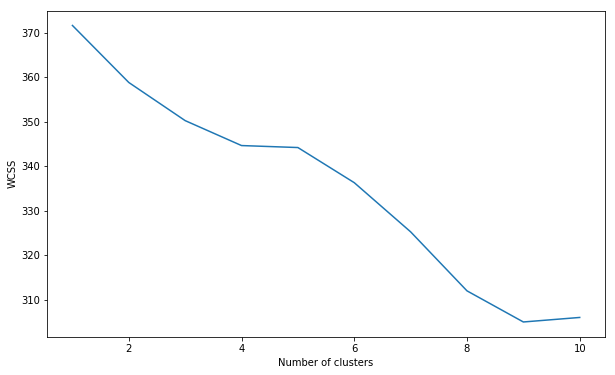

In [268]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=[10,6])
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

### Explore the Data by Silhouette Coefficient Method  

A higher Silhouette Coefficient score relates to a model with better-defined clusters.   

Here is the formula:  

$$ \large s = \frac{b-a}{max(a,b)}  $$  


a: The mean distance between a sample and all other points in the same class.   
b: The mean distance between a sample and all other points in the next nearest cluster.  

In [260]:
scores = []
k_range = range(2,11)
for n_cluster in k_range:
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    scores.append(sil_coeff)
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.028531346969208612
For n_clusters=3, The Silhouette Coefficient is 0.03343768132263573
For n_clusters=4, The Silhouette Coefficient is 0.045621324423257864
For n_clusters=5, The Silhouette Coefficient is 0.05275118089937686
For n_clusters=6, The Silhouette Coefficient is 0.06832729462008161
For n_clusters=7, The Silhouette Coefficient is 0.07133019882948817
For n_clusters=8, The Silhouette Coefficient is 0.08569918525654192
For n_clusters=9, The Silhouette Coefficient is 0.09509367067250872
For n_clusters=10, The Silhouette Coefficient is 0.09138467059956025


Text(0,0.5,'Silhouette Coefficient')

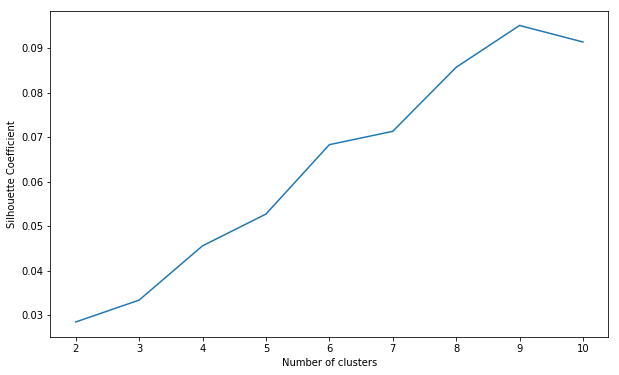

In [261]:
plt.figure(figsize=[10,6])
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')

### Modeling

Algos:  

(1) Random Forest Classifier (`rf`)  
(2) Gradient Boosting Classifier (`gb`)  
(3) XGBoost Classifier (`xgb`)  
(4) LinearSVC (`svc`)  
(5) K-Neighbors Classifier (`knn`)  

`GridSearchCV` has been used for hyperparameter optimization and cross vaildation (`cv=5`).  

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [255]:
pipelines = {
    'rf' : make_pipeline(RandomForestClassifier(random_state=123)),
    'gb' : make_pipeline(GradientBoostingClassifier(random_state=123)),
    'xgb': make_pipeline(XGBClassifier(random_state=123)),
    'svc': make_pipeline(LinearSVC(random_state=123)),
    'knn': make_pipeline(KNeighborsClassifier())
}

rf_hyperparameters  = {'randomforestclassifier__n_estimators': [100, 200]}
gb_hyperparameters  = {'gradientboostingclassifier__n_estimators': [100, 200]}
xgb_hyperparameters = {'xgbclassifier__n_estimators': [100, 200] }
svc_hyperparameters = {}
knn_hyperparameters = {}


hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'xgb': xgb_hyperparameters,
    'svc': svc_hyperparameters,
    'knn': knn_hyperparameters
}

fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=5, n_jobs=-1)
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print(name, 'has been fitted.')

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


rf has been fitted.


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


gb has been fitted.


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


xgb has been fitted.
svc has been fitted.
knn has been fitted.


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [256]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

rf 0.8681318681318682
gb 0.8681318681318682
xgb 0.8168498168498168
svc 0.8827838827838828
knn 0.8168498168498168


### Model Evaluation

In [257]:
for name, model in fitted_models.items():
    print(name, accuracy_score(y_test, model.predict(X_test)))

rf 0.9316239316239316
gb 0.9230769230769231
xgb 0.8888888888888888
svc 0.9145299145299145
knn 0.8803418803418803
